In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

MODEL_SLUG = "DDQN-400m-testCourse-08-12-2023_16:29"

FILE_PATH = f"./logs/{MODEL_SLUG}.csv"
episodes = pd.read_csv(FILE_PATH)

/Users/brycedavidson/Repos/RiderGymEnv/pyenv/lib/python3.9/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/brycedavidson/Repos/RiderGymEnv/pyenv/lib/python3.9/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


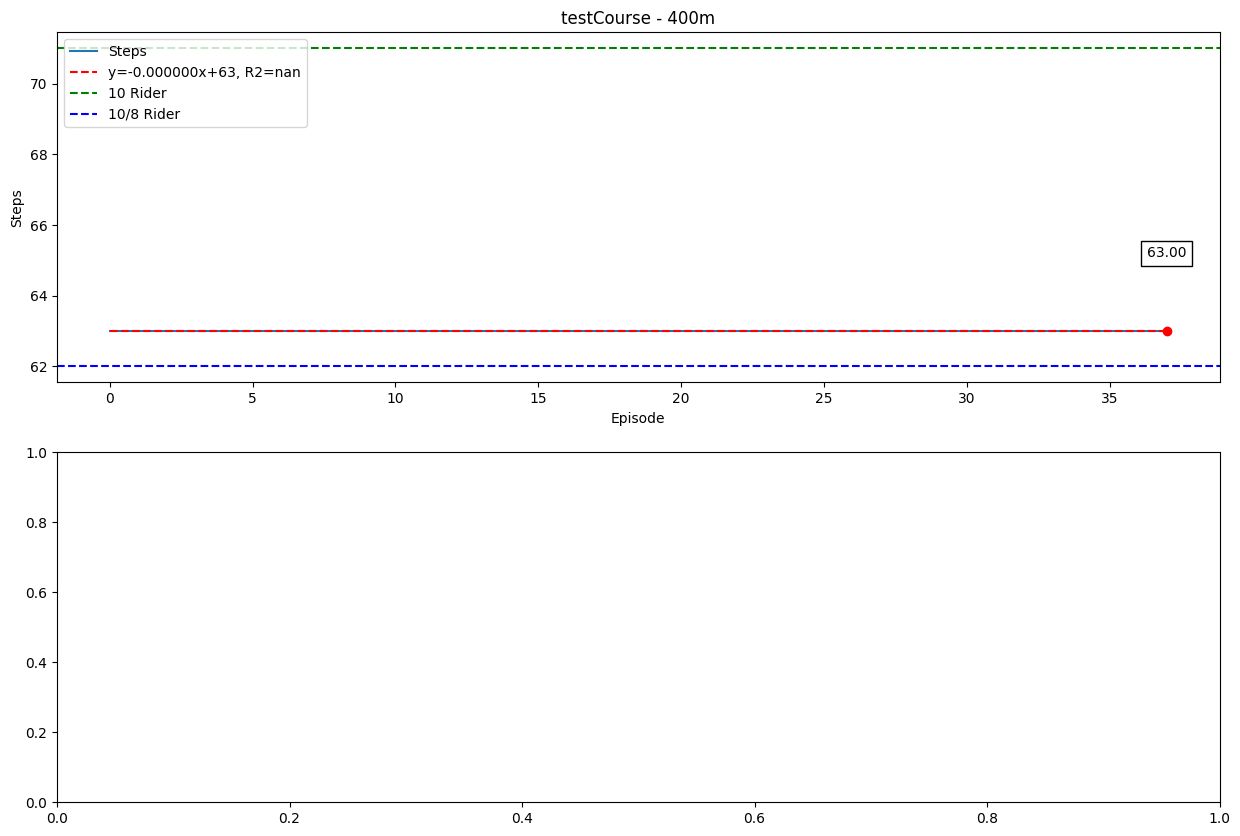

In [22]:
plt.rcParams['figure.figsize'] = [15, 10]

fig, axs = plt.subplots(2, 1)

# ---------------------------------------------

axs[0].plot(episodes['episode'], episodes['steps'])
axs[0].set_title("testCourse - 400m")
axs[0].set_ylabel("Steps")
axs[0].set_xlabel("Episode")

# Fit a line to the rolling average
x = episodes['episode']
y = episodes['steps']
z1 = np.polyfit(x, y, 1)
p1 = np.poly1d(z1)
axs[0].plot(x, p1(x), "r--")

# Add a horizontal line at 71 steps for the "10 Rider"
axs[0].axhline(y=71, color='g', linestyle='--')

# Add a horizontal line at 62 steps for the "10/8 Rider"
axs[0].axhline(y=62, color='b', linestyle='--')

# Plot current step as a point
current_step = p1(x.iloc[-1])
axs[0].plot(x.iloc[-1], current_step, 'ro')
# Add text to the point
axs[0].text(x.iloc[-1], current_step + 2, f"{current_step:.2f}", ha='center', va='bottom', bbox=dict(facecolor='white', alpha=1))

# Add a legend
axs[0].legend(['Steps', f"y={p1[1]:.6f}x+{p1[0]:.0f}, R2={np.corrcoef(x, y)[0, 1]:.2f}", "10 Rider", "10/8 Rider"], loc='upper left')

# ---------------------------------------------